In [47]:
# Install dependencies
!pip install pandas numpy matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [48]:
from google.colab import files
uploaded = files.upload()  # Choose train.csv here


Saving data_description.txt to data_description (6).txt


In [49]:
import pandas as pd
data = pd.read_csv("data_description.txt", sep="\t", engine="python", on_bad_lines='skip')
data.head()


,MSSubClass: Identifies the type of dwelling involved in the sale.,Unnamed: 1
0,20,1-STORY 1946 & NEWER ALL STYLES
1,30,1-STORY 1945 & OLDER
2,40,1-STORY W/FINISHED ATTIC ALL AGES
3,45,1-1/2 STORY - UNFINISHED ALL AGES
4,50,1-1/2 STORY FINISHED ALL AGES


In [50]:
data.info()
data.describe()
data.isnull().sum().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 2 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   MSSubClass: Identifies the type of dwelling involved in the sale.  377 non-null    object
 1   Unnamed: 1                                                         295 non-null    object
dtypes: object(2)
memory usage: 6.3+ KB


,0
Unnamed: 1,99
MSSubClass: Identifies the type of dwelling involved in the sale.,17


In [51]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train (3).csv


In [52]:
import pandas as pd

data = pd.read_csv("train.csv")
print(data.shape)
data.head()


(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
data = data[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
             'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']]

data = data.dropna()


In [54]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load your dataset
data = pd.read_csv("train.csv")

# Select important columns
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
            'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']

df = data[features].dropna()

# Handle non-numeric columns automatically
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("✅ Model trained successfully!")
print("Training Accuracy (R² Score):", model.score(X_train, y_train))
print("Testing Accuracy (R² Score):", model.score(X_test, y_test))


✅ Model trained successfully!
Training Accuracy (R² Score): 0.7593132070324216
Testing Accuracy (R² Score): 0.7950095261783585


In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [57]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)


MAE: 25121.61954347161
MSE: 1572343803.577843
R² Score: 0.7950095261783585


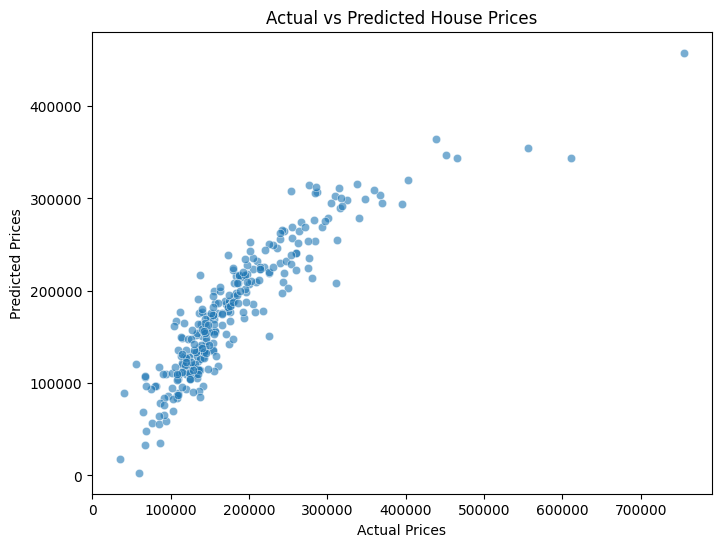

In [58]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib


In [60]:
data = pd.read_csv("train.csv")
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
            'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']

df = data[features].dropna()

for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("✅ Model trained successfully!")
print("Training Accuracy (R²):", model.score(X_train, y_train))
print("Testing Accuracy (R²):", model.score(X_test, y_test))


✅ Model trained successfully!
Training Accuracy (R²): 0.7593132070324216
Testing Accuracy (R²): 0.7950095261783585


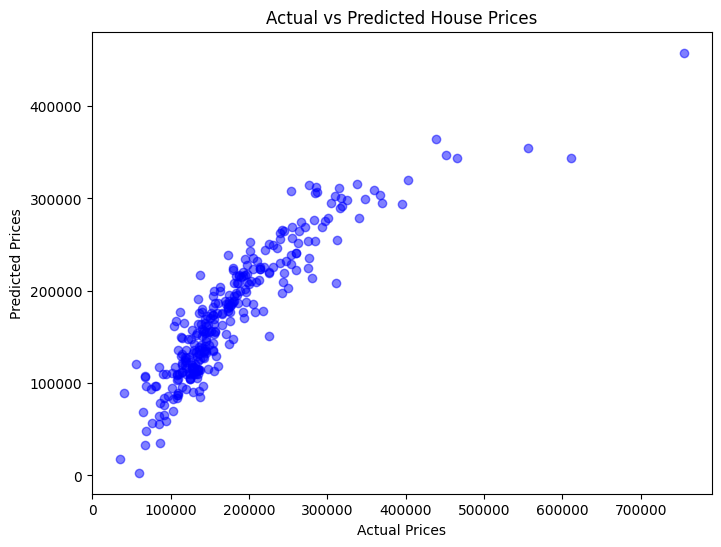

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [64]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 25121.61954347161
Mean Squared Error: 1572343803.577843
Root Mean Squared Error: 39652.79061526241


In [65]:
joblib.dump(model, "house_price_model.pkl")
print("✅ Model saved as house_price_model.pkl")


✅ Model saved as house_price_model.pkl
